In [60]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gspread
from oauth2client.service_account import ServiceAccountCredentials


In [61]:
#Import dataset
# pd.set_option('display.max_columns',None)
# orig_df = pd.read_csv("fitness analysis.csv")
# orig_df

scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

creds = ServiceAccountCredentials.from_json_keyfile_name("keys.json", scope)

client = gspread.authorize(creds)

sheet = client.open("fitness analysis").sheet1 

data = sheet.get_all_records()

orig_df = pd.DataFrame(data)

pd.set_option('display.max_columns', None)
orig_df

,Your name,Gender,Your age,How important is exercise to you?,How do you describe your current level of fitness?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit
3,Anusha,Female,15 to 18,4,Good,3 to 4 times a week,I don't have enough time,Walking or jogging;Gym;Lifting weights,Alone,Evening,1 hour,Yes,Temptation and cravings,4,Yes,No,I want to be fit;I want to lose weight
4,Nikkitha,Female,19 to 25,3,Unfit,Never,I can't stay motivated,I don't really exercise,I don't really exercise,Evening,I don't really exercise,Yes,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2765,Bupesh R,Female,15 to 18,2,Very good,1 to 2 times a week,I don't have enough time;I'll become too tired...,Swimming,Occasionally,Evening,1 hour,Not always,Ease of access to fast food;Temptation and cra...,5,Yes,No,I want to increase muscle mass and strength
2766,Dharani,Female,15 to 18,3,Good,Never,I don't have enough time,Gym;Swimming;Lifting weights,Regularly,Early morning,2 hours,Yes,Cost,4,Yes,Yes,I want to be fit;I'm sorry ... I'm not really ...
2767,Mahalakshmi,Female,40 and above,2,Very good,5 to 6 times a week,I don't have enough time;I exercise regularly ...,Walking or jogging;Lifting weights,Occasionally,Afternoon,I don't really exercise,Yes,Temptation and cravings,3,Yes,No,I want to lose weight;I want to relieve stress
2768,Subash,Male,30 to 40,3,Good,Never,I can't stay motivated;Laziness,Gym;Swimming,Regularly,Afternoon,1 hour,Yes,Temptation and cravings,1,No,Yes,I want to be fit;I want to lose weight;I want ...


In [62]:
#Create a working set
df = orig_df.copy()

In [63]:
df.shape

(2770, 17)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2770 entries, 0 to 2769
Data columns (total 17 columns):
 #   Column                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                       --------------  ----- 
 0   Your name                                                                                                    2770 non-null   object
 1   Gender                                                                                                       2770 non-null   object
 2   Your age                                                                                                     2770 non-null   object
 3   How important is exercise to you?                                                                            2770 non-null   object
 4   How do you describe your current level of fitness?                

In [65]:
#Renaming columns
new_columns_names = {
    'Gender':'Gender',
    'Your age' : 'Age',
    'How important is exercise to you?' : 'Importance',
    'How do you describe your current level of fitness?' : 'Fitness_level',
    'How often do you exercise?': 'Frequency ',
    'What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)':'Exercise_barriers',
    'What form(s) of exercise do you currently participate in ?            (Please select all that apply)': 'Exercise_form',
    'Do you exercise ___________ ?': "Group_or_ Individual_fitness",
    'What time if the day do you prefer to exercise?':'Time',
    'How long do you spend exercising per day ?':'Duration',
    'Would you say you eat a healthy balanced diet ?':'Healthy_diet',
    'What prevents you from eating a healthy balanced diet, If any?             (Please select all that apply)':'Diet_barriers',
    'How healthy do you consider yourself?':'Personal_health_level',
    'Have you ever recommended your friends to follow a fitness routine?':'Friendly_recommendation',
    'Have you ever purchased a fitness equipment?':'Purchased_fitness_equipment',
    'What motivates you to exercise?         (Please select all that applies )':'Motivation'
}
df.rename(columns=new_columns_names,inplace=True)

In [66]:
print(df.columns,sep='\n')
print(df.dtypes,sep='\n')

Index(['Your name', 'Gender', 'Age', 'Importance', 'Fitness_level',
       'Frequency ', 'Exercise_barriers', 'Exercise_form',
       'Group_or_ Individual_fitness', 'Time', 'Duration', 'Healthy_diet',
       'Diet_barriers', 'Personal_health_level', 'Friendly_recommendation',
       'Purchased_fitness_equipment', 'Motivation'],
      dtype='object')
Your name                       object
Gender                          object
Age                             object
Importance                      object
Fitness_level                   object
Frequency                       object
Exercise_barriers               object
Exercise_form                   object
Group_or_ Individual_fitness    object
Time                            object
Duration                        object
Healthy_diet                    object
Diet_barriers                   object
Personal_health_level            int64
Friendly_recommendation         object
Purchased_fitness_equipment     object
Motivation             

# Gender breakdown

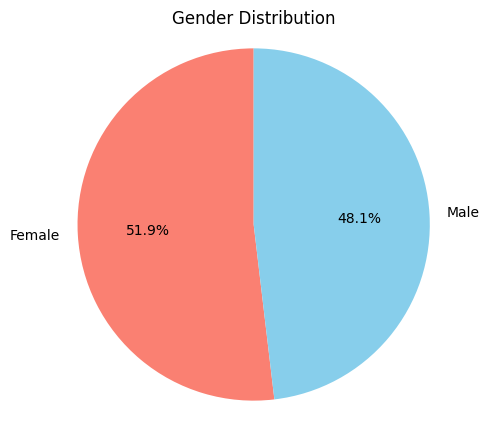

In [67]:
# Gender breakdown
gender_distro = df['Gender'].value_counts()/len(df)

plt.figure(figsize=(5, 5))
plt.pie(gender_distro, labels=gender_distro.index, autopct='%1.1f%%', startangle=90, colors=['salmon','skyblue'])
plt.title('Gender Distribution')
plt.axis('equal')  
plt.show()

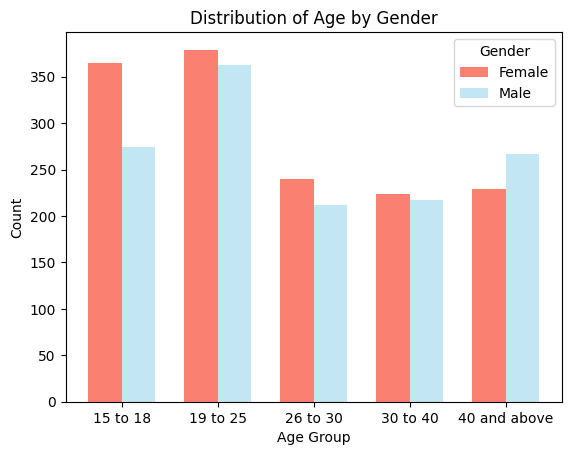

In [68]:
#Age breakdown by Gender

# Distribution of age group by Gender
age_counts = df.groupby(['Age', 'Gender']).size().unstack()
age_counts_sorted = age_counts.sort_index()

# Plot  gender
bar_width = 0.35
bar_positions_female = np.arange(len(age_counts_sorted))
bar_positions_male = bar_positions_female + bar_width
plt.bar(bar_positions_female, age_counts_sorted['Female'], width=bar_width, color='salmon', label='Female')
plt.bar(bar_positions_male, age_counts_sorted['Male'], width=bar_width, color='skyblue', label='Male', alpha=0.5)  

# Axis labels
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age by Gender')
plt.xticks([pos + bar_width / 2 for pos in bar_positions_female], age_counts_sorted.index) 
plt.legend(title='Gender')

In [69]:
#Current fitness level by gender
fitness_level_gender_counts = df[['Fitness_level','Gender']].value_counts().reset_index(name='count')

#Unpivot for cleaner look
unpivoted_fitness_level = fitness_level_gender_counts.pivot(index='Fitness_level', columns='Gender', values='count').reset_index()
unpivoted_fitness_level.columns.name = None
unpivoted_fitness_level

,Fitness_level,Female,Male
0,Average,404,316
1,Good,358,338
2,Perfect,203,216
3,Unfit,235,230
4,Very good,237,233


# Analysis of woman by age group

The importance of exercise goes up for woman after 25

Text(0.5, 1.0, "Female's Exercise Importance by Age")

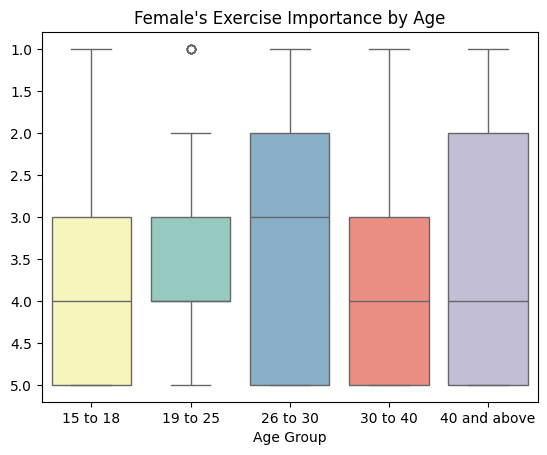

In [70]:
female_df = df[df['Gender'] == 'Female']

sns.boxplot(data=female_df, x='Age', y='Importance', hue='Age', palette='Set3', order=['15 to 18', '19 to 25', '26 to 30', '30 to 40', '40 and above'], legend=False)
plt.xlabel('Age Group')
plt.ylabel('')
plt.title('Female\'s Exercise Importance by Age')



Text(0.5, 1.0, "Male's Exercise Importance by Age")

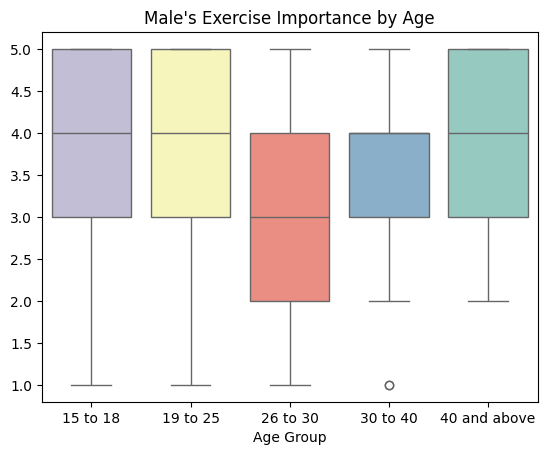

In [71]:
male_df = df[df['Gender'] == 'Male']

sns.boxplot(data=male_df, x='Age', y='Importance', hue='Age', palette='Set3', order=['15 to 18', '19 to 25', '26 to 30', '30 to 40', '40 and above'], legend=False)
plt.xlabel('Age Group')
plt.ylabel('')
plt.title('Male\'s Exercise Importance by Age')

In [72]:
female_age = female_df.groupby('Age')
barriers_df = female_age['Exercise_barriers'].value_counts().reset_index(name='count')


Across all age ranges "I dont have time" is the #1 barrier to exercising regularly for women

In [73]:
barriers_by_age = barriers_df.pivot(index='Age', columns='Exercise_barriers', values='count').reset_index()
barriers_by_age

Exercise_barriers,Age,I always busy with my regular works,I am lazy,I can't stay motivated,I can't stay motivated;I don't really enjoy exercising,I can't stay motivated;I exercise regularly with no barriers,I can't stay motivated;I'll become too tired,I can't stay motivated;I'll become too tired;I don't really enjoy exercising,I can't stay motivated;Laziness,I can't stay motivated;Laziness,I can't stay motivated;Laziness mostly,I don't have enough time,I don't have enough time;I can't stay motivated,I don't have enough time;I can't stay motivated;I am not regular in anything,I don't have enough time;I can't stay motivated;I don't really enjoy exercising,I don't have enough time;I can't stay motivated;I'll become too tired,I don't have enough time;I can't stay motivated;I'll become too tired;I don't really enjoy exercising,I don't have enough time;I can't stay motivated;I'll become too tired;I have an injury,I don't have enough time;I can't stay motivated;I'll become too tired;Less stamina,I don't have enough time;I don't really enjoy exercising,I don't have enough time;I exercise regularly with no barriers,I don't have enough time;I have an injury,I don't have enough time;I have an injury;No gym near me,I don't have enough time;I'll become too tired,I don't have enough time;I'll become too tired;I don't really enjoy exercising,I don't have enough time;I'll become too tired;I have an injury,I don't really enjoy exercising,I exercise regularly with no barriers,I have an injury,I'll become too tired,I'll become too tired;I don't really enjoy exercising,I'll become too tired;I have an injury,I'll become too tired;I have an injury;Laziness,I'm too lazy,Laziness,Laziness,Lazy,Travel time I skip
0,15 to 18,NaN,12.0,36.0,10.0,NaN,14.0,1.0,9.0,NaN,NaN,46.0,23.0,13.0,6.0,16.0,9.0,8.0,9.0,19.0,11.0,1.0,1.0,20.0,5.0,12.0,16.0,19.0,9.0,19.0,10.0,9.0,NaN,1.0,1.0,NaN,NaN,NaN
1,19 to 25,NaN,11.0,36.0,12.0,1.0,16.0,1.0,9.0,4.0,3.0,57.0,30.0,16.0,6.0,13.0,6.0,7.0,15.0,15.0,9.0,NaN,NaN,20.0,9.0,6.0,14.0,14.0,8.0,21.0,11.0,7.0,NaN,NaN,NaN,1.0,1.0,NaN
2,26 to 30,NaN,12.0,9.0,5.0,NaN,10.0,NaN,7.0,NaN,NaN,14.0,11.0,6.0,7.0,14.0,7.0,10.0,12.0,9.0,5.0,NaN,NaN,12.0,11.0,7.0,9.0,12.0,10.0,16.0,12.0,12.0,1.0,NaN,NaN,NaN,NaN,NaN
3,30 to 40,NaN,9.0,12.0,10.0,NaN,5.0,NaN,7.0,NaN,NaN,30.0,8.0,11.0,6.0,8.0,9.0,6.0,6.0,10.0,14.0,NaN,NaN,14.0,4.0,10.0,8.0,7.0,12.0,5.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
4,40 and above,1.0,7.0,19.0,6.0,NaN,6.0,NaN,7.0,NaN,NaN,21.0,6.0,9.0,9.0,7.0,6.0,12.0,1.0,6.0,13.0,1.0,NaN,9.0,9.0,6.0,11.0,19.0,6.0,12.0,7.0,10.0,NaN,NaN,NaN,NaN,NaN,3.0


Afternoon is the least preferred time of women to workout. 

In [74]:
# time_df = female_age['Time'].value_counts().reset_index(name='count')
# time_df.pivot(index='Age', columns='Time', values='count').reset_index(name='count')

time_df = pd.crosstab(female_df['Age'], female_df['Time'])

<Figure size 1000x600 with 0 Axes>

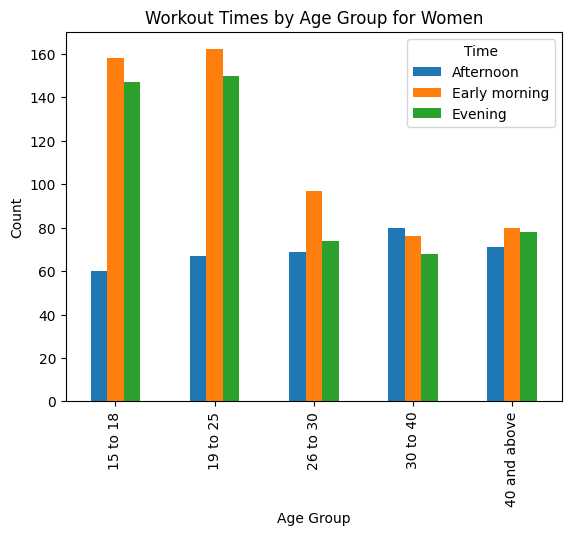

In [75]:
plt.figure(figsize=(10, 6))
time_df.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Workout Times by Age Group for Women')
plt.legend(title='Time')
plt.show()

Frequency of workouts by Age group

In [76]:
custom_order = ['Never','1 to 2 times a week','2 to 3 times a week','3 to 4 times a week','5 to 6 times a week','Everyday']
female_df['Frequency '] = pd.Categorical(female_df['Frequency '], categories=custom_order, ordered=True)
#female_df['Frequency '].value_counts().reset_index().sort_values(by='Frequency ')
female_df.groupby(['Age','Frequency ']).size().reset_index(name='Count')

/var/folders/1p/dcsgpyc97dlc273mlchv4v8r0000gn/T/ipykernel_74049/3716528484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['Frequency '] = pd.Categorical(female_df['Frequency '], categories=custom_order, ordered=True)


,Age,Frequency,Count
0,15 to 18,Never,69
1,15 to 18,1 to 2 times a week,81
2,15 to 18,2 to 3 times a week,55
3,15 to 18,3 to 4 times a week,46
4,15 to 18,5 to 6 times a week,51
5,15 to 18,Everyday,63
6,19 to 25,Never,72
7,19 to 25,1 to 2 times a week,107
8,19 to 25,2 to 3 times a week,55
9,19 to 25,3 to 4 times a week,60


In [77]:
# Pivot for a cleaner look
freq_pivot_df = female_df.pivot_table(index='Frequency ', columns='Age', aggfunc='size', fill_value=0)
freq_pivot_df

Age,15 to 18,19 to 25,26 to 30,30 to 40,40 and above
Frequency,,,,,
Never,69,72,43,43,37
1 to 2 times a week,81,107,46,34,48
2 to 3 times a week,55,55,45,40,35
3 to 4 times a week,46,60,33,39,47
5 to 6 times a week,51,35,33,39,35
Everyday,63,50,40,29,27


Text(33.222222222222214, 0.5, 'Frequency of Workouts')

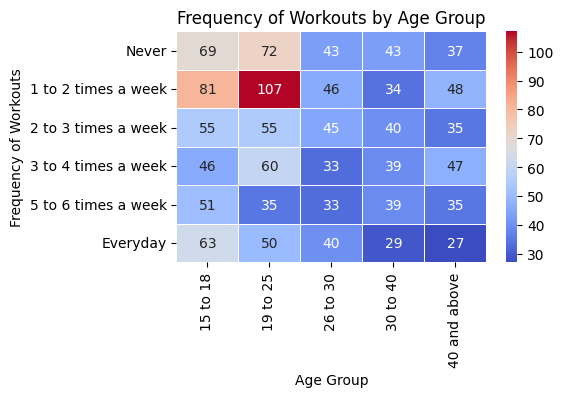

In [78]:
plt.figure(figsize=(5, 3))
sns.heatmap(data=freq_pivot_df, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)

# Add labels and title
plt.title('Frequency of Workouts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency of Workouts')

In [79]:
# Convert to percentages
total_counts = freq_pivot_df.sum(axis=1)
percentages_df = (freq_pivot_df.div(total_counts, axis=0) * 100).round()

percentages_with_sign = percentages_df.applymap(lambda x: f"{x:.2f}%").round(0)
percentages_with_sign

Age,15 to 18,19 to 25,26 to 30,30 to 40,40 and above
Frequency,,,,,
Never,26.00%,27.00%,16.00%,16.00%,14.00%
1 to 2 times a week,26.00%,34.00%,15.00%,11.00%,15.00%
2 to 3 times a week,24.00%,24.00%,20.00%,17.00%,15.00%
3 to 4 times a week,20.00%,27.00%,15.00%,17.00%,21.00%
5 to 6 times a week,26.00%,18.00%,17.00%,20.00%,18.00%
Everyday,30.00%,24.00%,19.00%,14.00%,13.00%
